In [1]:
import numpy as np
import anndata as ad

n_obs = 10
n_var = 5
var_embedding_dim = 3
X = np.random.random((n_obs, n_var))
varm = np.random.random((n_var, var_embedding_dim))
varm_str = 'embedding'
adata = ad.AnnData(X=X, varm={varm_str: varm})

/var/folders/6n/b_zkz2ns3_l02s3g4lnlklxr0000gq/T/ipykernel_2396/1332689802.py:10: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X=X, varm={varm_str: varm})


In [2]:
from rosa.data.datasets import RosaDataset

Global seed set to 0
/Users/nsofroniew/opt/anaconda3/envs/multiomics/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/nsofroniew/opt/anaconda3/envs/multiomics/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [3]:
rds = RosaDataset(adata, var_input=varm_str)

In [4]:
assert len(rds) == n_obs
assert rds.n_var == n_var

In [5]:
rds[0]

{'expression': tensor([0.8032, 0.0245, 0.0266, 0.0377, 0.4960]),
 'mask': tensor([False, False, False, False, False]),
 'indices': tensor([0, 1, 2, 3, 4])}

In [6]:
np.testing.assert_almost_equal(rds[0]['expression'], X[0])

In [7]:
np.testing.assert_almost_equal(rds.var_indices, np.arange(n_var))

In [47]:
var_indices = np.arange(n_var)
rds = RosaDataset(adata, var_input=varm_str, n_var_sample=2)

In [9]:
import torch

In [48]:
indices = []
masks = []
masked_indices = []

for i in range(10000):
    item = rds[0]
    indices.append(item['indices'])
    masks.append(item['mask'])
    masked_indices.append(item['indices'][item['mask']])

indices = torch.unique(torch.cat(indices), return_counts=True) #
masks = torch.unique(torch.cat(masks), return_counts=True) #
masked_indices = torch.unique(torch.cat(masked_indices), return_counts=True) #
print(indices)
print(masks)
print(masked_indices)
np.testing.assert_almost_equal(indices[0], var_indices)

(tensor([0, 1, 2, 3, 4]), tensor([4004, 4057, 4009, 3996, 3934]))
(tensor([False]), tensor([20000]))
(tensor([], dtype=torch.int64), tensor([], dtype=torch.int64))


In [11]:
rds = RosaDataset(adata, var_input=varm_str, n_var_sample=2, mask=0.1)

In [12]:
a = []
for i in range(10000):
    a.append(rds[0]['mask'])
torch.unique(torch.cat(a), return_counts=True) #

(tensor([False,  True]), tensor([18019,  1981]))

In [ ]:
a = []
for i in range(10000):
    a.append(rds[0]['indices'][rds[0]['mask']])
torch.unique(torch.cat(a), return_counts=True) #

In [40]:
obs_indices=[1, 2, 4, 6]
var_indices=[1, 3, 4]
rds = RosaDataset(adata, var_input=varm_str, n_var_sample=2, obs_indices=obs_indices, var_indices=var_indices, mask=0.1)

In [41]:
assert len(rds) == len(obs_indices)
assert rds.n_var == len(var_indices)

In [42]:
a = []
for i in range(10000):
    a.append(rds[0]['indices'])
torch.unique(torch.cat(a), return_counts=True) #

(tensor([1, 3, 4]), tensor([6641, 6685, 6674]))

In [43]:
a = []
for i in range(10000):
    a.append(rds[0]['mask'])
torch.unique(torch.cat(a), return_counts=True) #

(tensor([False,  True]), tensor([17958,  2042]))

In [44]:
a = []
for i in range(10000):
    a.append(rds[0]['indices'][rds[0]['mask']])
torch.unique(torch.cat(a), return_counts=True) #

(tensor([1, 3, 4]), tensor([622, 665, 674]))

In [17]:
item = rds[0]
np.testing.assert_almost_equal(item['expression'], X[obs_indices[0], item['indices']])

In [18]:
np.testing.assert_almost_equal(rds.var_indices, var_indices)

In [50]:
obs_indices=[1, 2, 4, 6]
mask_indices=[1, 3, 4]
var_indices = np.arange(n_var)
rds = RosaDataset(adata, var_input=varm_str, n_var_sample=2, obs_indices=obs_indices, var_indices=None, mask=mask_indices)

In [52]:
indices = []
masks = []
masked_indices = []

for i in range(10000):
    item = rds[0]
    indices.append(item['indices'])
    masks.append(item['mask'])
    masked_indices.append(item['indices'][item['mask']])

indices = torch.unique(torch.cat(indices), return_counts=True) #
masks = torch.unique(torch.cat(masks), return_counts=True) #
masked_indices = torch.unique(torch.cat(masked_indices), return_counts=True) #
print(indices)
print(masks)
print(masked_indices)
np.testing.assert_almost_equal(indices[0], var_indices)
np.testing.assert_almost_equal(masked_indices[0], mask_indices)

(tensor([0, 1, 2, 3, 4]), tensor([4017, 4058, 4005, 3985, 3935]))
(tensor([False,  True]), tensor([ 8022, 11978]))
(tensor([1, 3, 4]), tensor([4058, 3985, 3935]))


In [58]:
obs_indices=[1, 2, 4, 6]
mask_indices=[1, 3, 4]
var_indices = [1, 2, 4]
rds = RosaDataset(adata, var_input=varm_str, n_var_sample=2, obs_indices=obs_indices, var_indices=var_indices, mask=mask_indices)

In [60]:
indices = []
masks = []
masked_indices = []

for i in range(10000):
    item = rds[0]
    indices.append(item['indices'])
    masks.append(item['mask'])
    masked_indices.append(item['indices'][item['mask']])

indices = torch.unique(torch.cat(indices), return_counts=True) #
masks = torch.unique(torch.cat(masks), return_counts=True) #
masked_indices = torch.unique(torch.cat(masked_indices), return_counts=True) #
print(indices)
print(masks)
print(masked_indices)
np.testing.assert_almost_equal(indices[0], var_indices)
np.testing.assert_almost_equal(masked_indices[0], [1, 4])

(tensor([1, 2, 4]), tensor([6644, 6675, 6681]))
(tensor([False,  True]), tensor([ 6675, 13325]))
(tensor([1, 4]), tensor([6644, 6681]))


In [177]:
import numpy as np
import anndata as ad
import scanpy as sc
# from rosa.preprocessing import (
#     clean_cells_genes,
# )

# RAW_ADATA_PT = "/Users/nsofroniew/Documents/data/multiomics/cell_census_old/tabula_sapiens_by_features.h5ad"
EMBEDS_ADATA_PT = "/Users/nsofroniew/Documents/data/multiomics/cell_census/tabula_sapiens__sample_single_cell__label_cell_type.h5ad"


In [178]:
adata = ad.read_h5ad(EMBEDS_ADATA_PT)

In [179]:
adata

AnnData object with n_obs × n_vars = 483152 × 19431
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_general', 'tissue_general_ontology_term_id', 'label', 'n_genes', 'train', 'marker_gene', 'marker_feature_name'
    var: 'soma_joinid', 'feature_name', 'feature_length', 'column_1', 'column_2', 'column_3', 'column_4', 'external_gene_name', 'gene_biotype', 'train'
    uns: 'preprocessing', 'rank_genes_groups', 'var_embedding_pca'
    varm: 'embedding', 'embedding_pca'

In [180]:
import torch

In [181]:
a = torch.arange(10)

In [182]:
a

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [196]:
b = a[[1, 3, 4, 7, 8]]

In [197]:
b

tensor([1, 3, 4, 7, 8])

In [205]:
torch.multinomial(b.float(), 2)

tensor([3, 4])

In [240]:
%%time
for i in range(1000):
    torch.multinomial(torch.ones(1000), 20)

CPU times: user 38.3 ms, sys: 1.02 ms, total: 39.3 ms
Wall time: 38.3 ms


In [243]:
%%time
for i in range(1000):
    torch.randperm(1000)[:20]

CPU times: user 6.58 ms, sys: 1.33 ms, total: 7.92 ms
Wall time: 7.04 ms


In [42]:
tensor = torch.from_numpy(adata.X[20])
n_bins = 8

In [116]:
boundaries = torch.quantile(tensor[tensor>0], torch.linspace(0, 1, n_bins-1))
boundaries = torch.concat([torch.tensor([0]), boundaries])
boundaries[-1] = torch.inf
b = torch.bucketize(tensor, boundaries, right=True) - 1

In [125]:
boundaries[-1] = torch.inf

In [118]:
(b == 4).sum()

tensor(2767)

In [119]:
b.max()

tensor(7)

In [120]:
import matplotlib.pyplot as plt

In [121]:
bins = np.arange(n_bins+1) - 0.5

(array([2.835e+03, 2.744e+03, 2.780e+03, 2.771e+03, 2.767e+03, 2.766e+03,
        2.765e+03, 1.000e+00]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5]),
 <BarContainer object of 8 artists>)

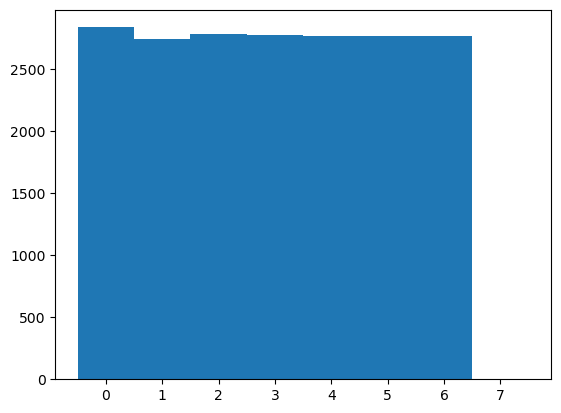

In [122]:
plt.hist(b, bins=bins)

In [54]:
b.unique()

tensor([2, 3, 4, 5, 6, 7, 8])

In [49]:
boundaries[0]

tensor(0.)

Text(0.5, 0, 'expression')

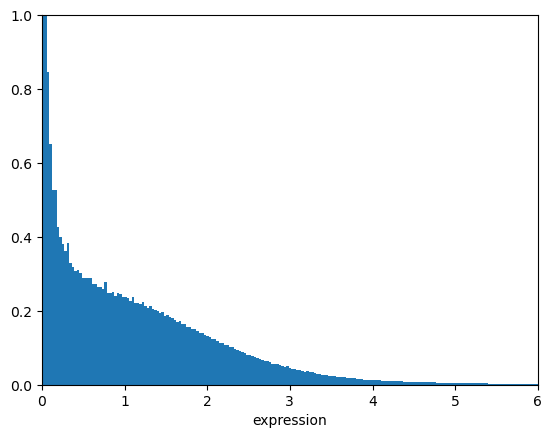

In [224]:
bins = np.linspace(0, 6, 200)
plt.hist(adata.X.flatten(), bins=bins, density=True)
plt.gca().set_ylim([0, 1])
plt.gca().set_xlim([0, 6])
plt.gca().set_xlabel("expression");

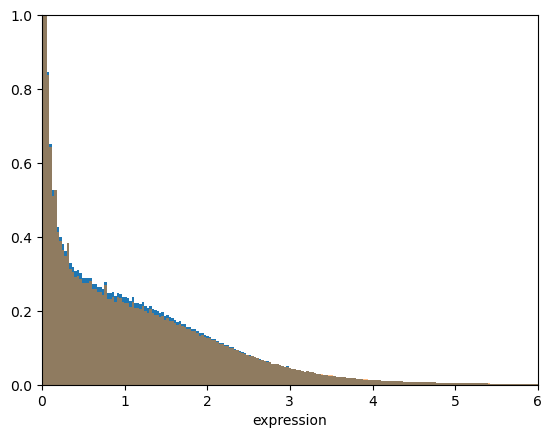

In [236]:
import pandas as pd 
bins = np.linspace(0, 6, 200)
plt.hist(adata.X.flatten(), bins=bins, density=True)
plt.hist(adata[~pd.isnull(adata.obs['cell_type'])].X.flatten(), bins=bins, density=True, alpha=0.5)
plt.gca().set_ylim([0, 1])
plt.gca().set_xlim([0, 6])
plt.gca().set_xlabel("expression");

In [240]:
adata_p

AnnData object with n_obs × n_vars = 160 × 19431
    obs: 'dataset_id', 'cell_type', 'cell_type_ontology_term_id', 'disease', 'disease_ontology_term_id', 'is_primary_data', 'suspension_type', 'label', 'sample', 'n_genes', 'train', 'marker_gene', 'marker_feature_name'
    var: 'soma_joinid', 'feature_name', 'feature_length', 'column_1', 'column_2', 'column_3', 'column_4', 'external_gene_name', 'gene_biotype', 'train', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'obs_embedding_pca', 'preprocessing', 'var_embedding_pca', 'rank_genes_groups', 'dendrogram_label', 'hvg'
    obsm: 'bin_edges', 'embedding', 'X_pca'
    varm: 'embedding', 'embedding_pca'
    layers: 'binned', 'counts', 'log1p', 'normalized_counts'

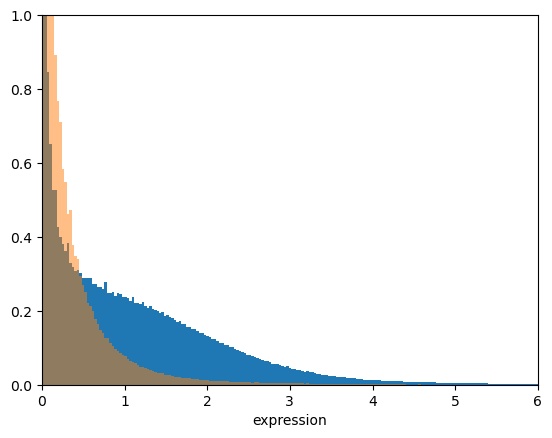

In [243]:
import pandas as pd 
bins = np.linspace(0, 6, 200)
plt.hist(adata.X.flatten(), bins=bins, density=True)
plt.hist(adata_p.X.flatten(), bins=bins, density=True, alpha=0.5)
plt.gca().set_ylim([0, 1])
plt.gca().set_xlim([0, 6])
plt.gca().set_xlabel("expression");

In [257]:
X = adata_p[adata_p.obs['cell_type'].isin(adata.obs['cell_type'])].X
X = np.expm1(X)
X = X * 10
X = np.log1p(X)

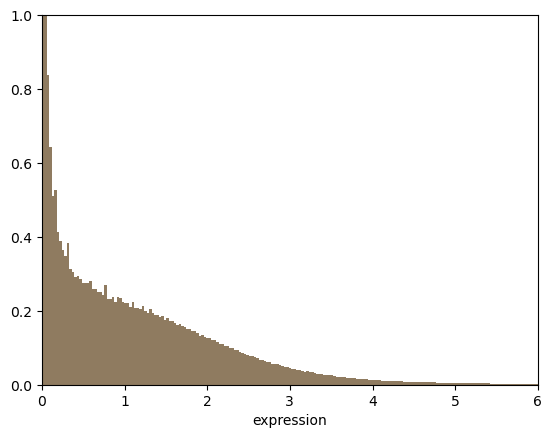

In [258]:
import pandas as pd 
bins = np.linspace(0, 6, 200)
plt.hist(adata[adata.obs['cell_type'].isin(adata_p.obs['cell_type'])].X.flatten(), bins=bins, density=True)
plt.hist(X.flatten(), bins=bins, density=True, alpha=0.5)
plt.gca().set_ylim([0, 1])
plt.gca().set_xlim([0, 6])
plt.gca().set_xlabel("expression");

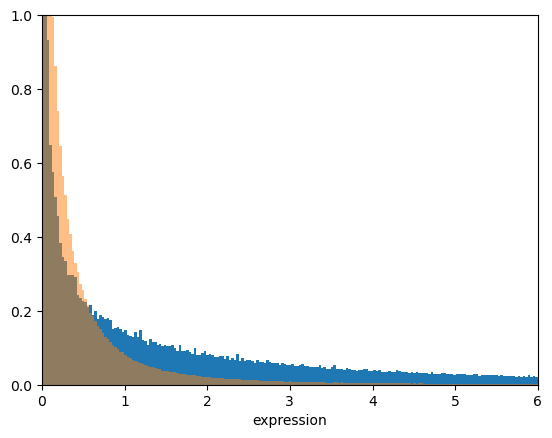

In [254]:
import pandas as pd 
bins = np.linspace(0, 6, 200)
plt.hist(adata[adata.obs['cell_type'].isin(adata_p.obs['cell_type'])].layers['normalized_counts'].flatten(), bins=bins, density=True)
plt.hist(adata_p[adata_p.obs['cell_type'].isin(adata.obs['cell_type'])].layers['normalized_counts'].flatten(), bins=bins, density=True, alpha=0.5)
plt.gca().set_ylim([0, 1])
plt.gca().set_xlim([0, 6])
plt.gca().set_xlabel("expression");

In [255]:
adata_p[adata_p.obs['cell_type'].isin(adata.obs['cell_type'])].layers['normalized_counts'].sum(axis=1)

ArrayView([10000.   , 10000.   , 10000.   , 10000.   , 10000.   ,
           10000.   , 10000.001, 10000.001, 10000.   ,  9999.999,
           10000.   , 10000.   , 10000.   , 10000.001, 10000.   ,
           10000.001, 10000.   , 10000.001, 10000.   , 10000.001,
            9999.999, 10000.   , 10000.   , 10000.   ,  9999.999,
            9999.999, 10000.001, 10000.   , 10000.   , 10000.001,
           10000.001,  9999.999, 10000.   ,  9999.999, 10000.   ,
           10000.   , 10000.   , 10000.   , 10000.   ,  9999.999,
           10000.   , 10000.002, 10000.   , 10000.001,  9999.999,
           10000.   , 10000.   , 10000.   ,  9999.999, 10000.   ,
           10000.   , 10000.002, 10000.001, 10000.   , 10000.001,
           10000.   , 10000.   , 10000.   , 10000.001, 10000.   ,
           10000.   , 10000.   , 10000.   , 10000.   , 10000.   ,
           10000.   , 10000.   , 10000.   ,  9999.999, 10000.   ,
           10000.   , 10000.   , 10000.   ,  9999.998, 10000.   ,
          

In [256]:
adata[adata.obs['cell_type'].isin(adata_p.obs['cell_type'])].layers['normalized_counts'].sum(axis=1)

ArrayView([100000.01 , 100000.   , 100000.   , 100000.   ,  99999.99 ,
            99999.984,  99999.984, 100000.01 , 100000.016, 100000.   ,
           100000.   ,  99999.99 , 100000.   ,  99999.984, 100000.   ,
           100000.   , 100000.   , 100000.   , 100000.   , 100000.   ,
           100000.016, 100000.   ,  99999.984, 100000.   , 100000.   ,
           100000.   ,  99999.99 , 100000.   , 100000.   , 100000.   ,
           100000.01 , 100000.01 , 100000.   , 100000.   ,  99999.99 ,
           100000.   , 100000.01 , 100000.01 , 100000.   , 100000.   ,
           100000.   , 100000.   ,  99999.99 , 100000.   , 100000.01 ,
           100000.   ,  99999.99 , 100000.   ,  99999.99 ,  99999.99 ,
           100000.   , 100000.   ,  99999.99 , 100000.01 , 100000.   ,
           100000.   , 100000.   , 100000.   ,  99999.99 ,  99999.99 ,
           100000.01 , 100000.   ,  99999.99 , 100000.   , 100000.   ,
           100000.01 , 100000.01 , 100000.01 , 100000.   ,  99999.99 ,
      

In [248]:
adata_p[adata_p.obs['cell_type'].isin(adata.obs['cell_type'])]

View of AnnData object with n_obs × n_vars = 132 × 19431
    obs: 'dataset_id', 'cell_type', 'cell_type_ontology_term_id', 'disease', 'disease_ontology_term_id', 'is_primary_data', 'suspension_type', 'label', 'sample', 'n_genes', 'train', 'marker_gene', 'marker_feature_name'
    var: 'soma_joinid', 'feature_name', 'feature_length', 'column_1', 'column_2', 'column_3', 'column_4', 'external_gene_name', 'gene_biotype', 'train', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'obs_embedding_pca', 'preprocessing', 'var_embedding_pca', 'rank_genes_groups', 'dendrogram_label', 'hvg'
    obsm: 'bin_edges', 'embedding', 'X_pca'
    varm: 'embedding', 'embedding_pca'
    layers: 'binned', 'counts', 'log1p', 'normalized_counts'

In [239]:
adata.obs['count'].min()

52

In [ ]:
adata.layers['counts'].sum(axis=1)

In [ ]:
adata.layers['counts_normalized'] = adata.layers['counts'].copy()
sc.pp.normalize_total(adata, target_sum=1e5, layer='counts_normalized')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.hist(adata.layers['counts_normalized'].flatten());

In [ ]:
from rosa.preprocessing import bin_expression, reconstruct_expression

In [ ]:
bin_expression(adata, 128)

In [ ]:
reconstruct_expression(adata)

In [ ]:
((adata.X - adata.layers['reconstructed'])**2).mean()

In [ ]:
# Plot residuals
plt.hist((adata.layers['reconstructed'] - adata.X).ravel(), bins=1000);
plt.xlim([-.25, .25]);

In [ ]:
# Identify cells and genes not trained on (when possible)
adata.layers['prediction'] = adata.layers['reconstructed']
test_genes = np.logical_not(adata.var["train"])
test_cells = np.logical_not(adata.obs["train"])
adata_test = adata[test_cells, test_genes]
sc.tl.dendrogram(adata_test, groupby="label", use_rep="X")


In [ ]:
from rosa.plotting import plot_marker_gene_heatmap

In [ ]:
marker_genes_dict = adata_test.obs.set_index('label').to_dict()['marker_feature_name']
plot_marker_gene_heatmap(adata_test, marker_genes_dict)

In [ ]:
plt.hist(adata.layers['binned'].flatten(), bins=25, density=True);

In [ ]:
plt.hist(adata.X.flatten(), bins=250, density=True);
plt.ylim([0, 1]);
plt.xlim([0, 8])

In [ ]:
adata.X

In [ ]:
from typing import Union

In [ ]:
adata.layers['X']

In [ ]:
np.empty((10, 0))[0]

In [ ]:
from enum import Enum, auto

class EmbeddingType(Enum):
    JOINT = auto()
    VAR = auto()
    OBS = auto()

In [ ]:
EmbeddingType.JOINT

In [ ]:
list(EmbeddingType.__members__)

In [ ]:
adata.X = np.ceil(adata.X)
sc.pp.filter_genes(adata, min_cells=1)
sc.experimental.pp.normalize_pearson_residuals(adata)
adata.X[adata.X<0] = 0

In [ ]:
2**10

In [ ]:
import torch

In [ ]:
np.isinf(adata.X).sum()

In [ ]:
np.isnan(adata.X).sum()

In [ ]:
sc.pp.log1p(adata)

In [ ]:
adata.X

In [ ]:
torch.tensor([0])

In [ ]:
adata.X = np.ceil(adata.X)
adata.layers["counts"] = adata.X.copy()

In [ ]:
sc.pp.filter_genes(adata, min_cells=1)

In [ ]:
sc.pp.filter_cells(adata, min_genes=1)

In [ ]:
adata

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.hist(adata.layers['counts'].sum(axis=1));

In [ ]:
print(adata.layers['counts'].sum(axis=1).mean() / 1e5)
print(adata.layers['counts'].sum(axis=1).var() / 1e10)

In [ ]:
adata.layers["counts_normalized_total"] = adata.X.copy()
sc.pp.normalize_total(adata, 1e5, layer="counts_normalized_total")

In [ ]:
print(adata.layers['counts_normalized_total'].sum(axis=1).mean() / 1e5)
print(adata.layers['counts_normalized_total'].sum(axis=1).var() / 1e10)

In [ ]:
adata.layers["counts_normalized_pearson"] = adata.X.copy()
adata.layers['counts_normalized_pearson'] = np.ceil(adata.layers['counts_normalized_pearson'])
sc.experimental.pp.normalize_pearson_residuals(adata, layer="counts_normalized_pearson", theta=1e2)

In [ ]:
np.isnan(adata.layers['counts_normalized_pearson']).sum()

In [ ]:
print(adata.layers['counts_normalized_pearson'].sum(axis=1).mean())
print(adata.layers['counts_normalized_pearson'].sum(axis=1).var())

In [ ]:
plt.hist(adata.layers['counts_normalized_pearson'].flatten(), np.linspace(0, 100, 1000));

In [ ]:
plt.hist(adata.layers['counts'].flatten(), np.linspace(0, 100, 1000));

In [ ]:
np.log1p(0.1)

In [ ]:
(adata.layers['counts_normalized_pearson'] - adata.layers['counts']).max()

In [ ]:
adata.layers['counts_normalized_pearson'] = np.round(adata.layers['counts_normalized_pearson'])

In [ ]:
np.isnan(adata.layers['counts_normalized_pearson'])[0]

In [ ]:
adata.layers['counts_normalized_pearson'].min()

In [ ]:
adata.uns['pearson_residuals_normalization']

In [ ]:
TABULA_SAPIENS_BY_CELL_TYPE_WITH_EMBEDS_PT = "/Users/nsofroniew/Documents/data/multiomics/cell_census/tabula_sapiens_by_features_with_embeds_new_norm.h5ad"

In [ ]:
adata_norm = ad.read_h5ad(TABULA_SAPIENS_BY_CELL_TYPE_WITH_EMBEDS_PT)

In [ ]:
y = np.exp(adata_norm.X) - 1

In [ ]:
y

In [ ]:
import scanpy as sc

In [ ]:
adata_norm.X = adata_norm.layers['counts'].copy()

In [ ]:
sc.pp.normalize_total(adata_norm, 1e5)

In [ ]:
(abs(adata_norm.X - y)).max()

In [ ]:
# from scipy.special import kl_div

# y_hat = np.asarray(adata[keep_cells].X.flatten())
# y = np.asarray(adata[keep_cells].layers['prediction'].flatten())

# kl_div(y, y_hat).mean()

In [ ]:
from scipy.stats import kstest, poisson

y_hat = np.asarray(adata[keep_cells].X.flatten())
y = np.asarray(adata[keep_cells].layers['prediction'].flatten())

kstest(y_hat, y)

In [ ]:
kstest(y, 'poisson', args=(np.mean(y),))

In [ ]:
from scipy.stats import kstest, poisson

poisson_dist = poisson(np.mean(y))

In [ ]:
y_p = poisson_dist.rvs(size=10000)

In [ ]:
hist, _ = np.histogram(y, bins=bins)
hist_hat, _ = np.histogram(y_hat, bins=bins)
plt.bar(bins[:-1], hist/hist.sum(), width=10/1000)
plt.bar(bins[:-1], hist_hat/hist_hat.sum(), alpha=0.5, width=10/1000)
plt.ylim([0, 1e-2]);
plt.xlim([0, 8]);

In [ ]:
poisson_dist = poisson(np.mean(y))
y_new = poisson_dist.rvs(size=10000)


hist, _ = np.histogram(y, bins=bins)
hist_new, _ = np.histogram(y_new, bins=bins)
plt.bar(bins[:-1], hist/hist.sum(), width=10/1000)
plt.bar(bins[:-1], hist_new//hist_new.sum(), alpha=0.5, width=10/1000)
plt.ylim([0, 1e-2]);
plt.xlim([0, 8]);

In [ ]:
initial_params = [.2, 0.1, 1.2, 0.0.001]

result = minimize(negative_binomial, initial_params, args=(y,), method='Nelder-Mead')

In [ ]:
# Extract the optimal parameters
r1, p1, r2, p2 = result.x
data = y

In [ ]:
from scipy.stats import nbinom

r1, p1, r2, p2 = (0.1, 0.1, 1.1, 0.1)

# nbinom_dist_1 = nbinom(9.1, 0.6)
# nbinom_dist_2 = nbinom(1.2, .001)
y_new = (nbinom.rvs(.2, 0.1, size=10000) + nbinom.rvs(1.2, 0.001, size=10000)) / 1000


hist, _ = np.histogram(y, bins=bins)
hist_new, _ = np.histogram(y_new, bins=bins)
plt.bar(bins[:-1], hist/hist.sum(), width=10/1000)
plt.bar(bins[:-1], hist_new/hist_new.sum(), alpha=0.5, width=10/1000)
plt.ylim([0, 1e-2]);
plt.xlim([0, 8]);

In [ ]:
import numpy as np
from scipy.optimize import minimize
from scipy.stats import nbinom
import matplotlib.pyplot as plt

# Generate sample data
data = y

# Define the negative binomial function
def negative_binomial(params, data):
    r1, p1, r2, p2 = params
    pmf1 = nbinom.pmf(1000 * data, r1, p1)
    pmf2 = nbinom.pmf(1000 * data, r2, p2)
    return -np.log(pmf1 + pmf2).sum()

# Define the initial values for the parameters
initial_params = (0.1, 0.1, 1.1, 0.1)


# Minimize the negative binomial function using the Nelder-Mead algorithm
result = minimize(negative_binomial, initial_params, args=(data,), method='Nelder-Mead')

# Extract the optimal parameters
r1, p1, r2, p2 = result.x

# Plot the histogram of the data
plt.hist(data, bins=30, density=True, alpha=0.5, label='Data')

# Plot the sum of the negative binomials
x = np.arange(0, data.max())
pmf1 = nbinom.pmf(x, r1, p1)
pmf2 = nbinom.pmf(x, r2, p2)
plt.plot(x, pmf1 + pmf2, 'r-', lw=2, label='Sum of Negative Binomials')

plt.xlabel('x')
plt.ylabel('Probability')
plt.legend()
plt.show()


In [ ]:
try:
  print(x)
except NameError:
  print("Variable x is not defined")

In [ ]:
import torch

In [ ]:
torch.long

In [ ]:
a = torch.tensor(2.3).type(torch.long)

In [ ]:
adata.varm['embedding'].shape

In [ ]:
import matplotlib.pyplot as plt

plt.hist(adata.varm['embedding'].ravel(), bins=2000);
plt.xlim([-0.5, 0.5]);

In [ ]:
adata.varm['embedding']

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# fit pca on training data
pca = PCA()
pca.fit(adata.varm['embedding'])


In [ ]:
E = pca.transform(adata.varm['embedding'])

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_));
plt.xlim([0, 3042])

In [ ]:
np.cumsum(pca.explained_variance_ratio_)[512]

In [ ]:
plt.hist(E[:, :512].ravel(), bins=2000);
plt.xlim([-1.5, 1.5]);

In [ ]:
E.shape

In [ ]:
import anndata as ad
from rosa.preprocessing import (
    calculate_gene_embeddings_pca,
)


EMBEDS_ADATA_PT = "/Users/nsofroniew/Documents/data/multiomics/cell_census/tabula_sapiens_by_features_with_embeds_new_norm.h5ad"

In [ ]:
adata = ad.read_h5ad(EMBEDS_ADATA_PT)
adata = calculate_gene_embeddings_pca(adata, 256)

In [ ]:
adata.uns["embedding_pca"]

In [ ]:
adata.write_h5ad(EMBEDS_ADATA_PT)

In [ ]:
adata.varm['embedding_pca'].shape

In [ ]:
adata.varm

In [ ]:
ADATA_BULK_PT = "/Users/nsofroniew/Documents/data/multiomics/cell_census/tabula_sapiens_pbulk.h5ad"
adata = ad.read_h5ad(ADATA_BULK_PT)


In [ ]:
adata.var.set_index("feature_id")

In [ ]:
base_pt = '/home/ec2-user/enformer/Homo_sapiens.GRCh38.genes.enformer_embeddings'
var_id = 'ENSG00000280445'
full_pt = f'{base_pt}/{var_id}.pt'

In [ ]:
import torch

In [ ]:
for i in range(64):
    var = torch.load(full_pt, map_location='cpu')['embedding']
    var = torch.from_numpy(var).type(torch.float32)

In [ ]:
type(var)

In [ ]:
896 // 2

In [ ]:
a = var.unsqueeze(0).unsqueeze(-3)
a.shape

In [ ]:
fc = torch.nn.Conv2d(1, 10, (896, 1))

In [ ]:
fc(a).view(a.shape[0], -1).shape

In [ ]:
view(a.shape[0], -1)

In [ ]:
import torch.nn.functional as F


class ToTensor(torch.nn.Module):
    """Convert ``numpy.ndarray`` to tensor.
    """
    def __init__(self, dtype: torch.dtype = torch.float32) -> None:
        super().__init__()
        self.dtype = dtype

    def forward(self, tensor: np.ndarray) -> torch.Tensor:
        return torch.from_numpy(tensor).type(torch.float32)

class CountNormalize(torch.nn.Module):
    """Normalize a tensor to a fixed total counts.
    """
    def __init__(self, total_counts=1):
        super().__init__()
        self.total_counts = total_counts

    def forward(self, tensor: torch.Tensor) -> torch.Tensor:
        return self.total_counts * F.normalize(tensor, p=1.0, eps=1e-12)


class Log1p(torch.nn.Module):
    """Log1p normalize a tensor.
    """
    def __init__(self):
        super().__init__()

    def forward(self, tensor: torch.Tensor) -> torch.Tensor:
        return torch.log1p(tensor)


class QuantileNormalize(torch.nn.Module):
    """Normalize a tensor by quantiles.
    """
    def __init__(self, n_bins):
        super().__init__()
        self.n_bins = n_bins

    def forward(self, tensor: torch.Tensor) -> torch.Tensor:
        boundaries = torch.quantile(tensor, torch.linspace(0, 1, self.n_bins))
        return torch.bucketize(tensor, boundaries)

In [ ]:
class ExpressionTransform(torch.nn.Sequential):
    def __init__(self, cfg):
        # Add base transform
        transforms = [ToTensor()]

        if cfg.total_counts is not None:
            transforms.append(CountNormalize(cfg.total_counts))

        if cfg.log1p:
            transforms.append(Log1p())

        if cfg.n_bins is not None:
            transforms.append(QuantileNormalize(cfg.n_bins))

        super().__init__(*transforms)


from dataclasses import dataclass
from typing import Optional


@dataclass
class ExpressionTransformConfig:
    total_counts: Optional[int] = None
    log1p: Optional[bool] = None
    n_bins: Optional[int] = None

In [ ]:
exp_cfg = ExpressionTransformConfig(n_bins=10)

In [ ]:
tf = ExpressionTransform(exp_cfg)

In [ ]:
torch.quantile(ToTensor()(X).unsqueeze(0), torch.linspace(0, 1, 5), dim=-1, keepdim=True).shape

In [ ]:
ToTensor()(X).unsqueeze(0).shape

In [ ]:
tf(np.random.rand(20))

In [ ]:
X[1]

In [ ]:
a = torch.nn.Sequential(ToTensor(), CountNormalize(10), Log1p(), QuantileNormalize(10))
b = torch.nn.Sequential(ToTensor(), QuantileNormalize(10))

In [ ]:
X = np.random.rand(3, 30)
X [0, :3] = 0
X [0, :] = X [0, :] * 1000
# X = torch.randint(1, 5, size=(3, 3))

In [ ]:
X

In [ ]:
a(X)

In [ ]:
b(X)

In [ ]:
a(X).sum(dim=1)

In [ ]:
20 * 512 / 1e3

In [ ]:
type(torch.float32)

In [ ]:
import numpy as np

In [ ]:
np.unravel_index(10, (9, 2))

In [ ]:
EMBEDS_ADATA_PT = '/Users/nsofroniew/Documents/data/multiomics/cell_census/tabula_sapiens_by_features_with_embeds_new_norm.h5ad'

In [ ]:
EMBEDS_ADATA_PT_2 = "/Users/nsofroniew/Documents/data/multiomics/cell_census/tabula_sapiens_by_features_raw.h5ad"


In [ ]:
import anndata as ad

In [ ]:
adata = ad.read_h5ad(EMBEDS_ADATA_PT)
adata_2 = ad.read_h5ad(EMBEDS_ADATA_PT_2)

In [ ]:
adata.layers['counts'][0, 0]

In [ ]:
adata_2.X.sum(axis=1).mean()

In [ ]:
adata.X[0, 0]

In [ ]:
adata.layers['binned'][0, 0]

In [ ]:
adata_2.X[0, 0]

In [ ]:
from enum import Enum, auto
from typing import Optional


class ExpressionActivations(Enum):
    SOFTPLUS = auto()
    SOFTMAX = auto()

In [ ]:
str(ExpressionActivations.SOFTPLUS)

In [ ]:
ExpressionActivations.SOFTPLUS.name.lower()

In [ ]:
import torch.nn as nn

In [ ]:
a=nn.Sequential()

In [ ]:
a.append(nn.Linear(1, 1))

In [ ]:
body = nn.Identity()

In [ ]:
body(torch.rand(10, 10)).shape

In [ ]:
map((body, body), (torch.rand(10, 10), torch.rand(10, 10)))

In [ ]:
torch.add((torch.rand(10, 10), torch.rand(10, 10))).shape

In [ ]:
torch.cat((torch.rand(10, 10), torch.rand(10, 10)), dim=-1).shape

In [ ]:
from typing import Tuple

class AttentionEmbeds(nn.Module):
    def __init__(self, in_dim: Tuple[int, int], out_dim) -> None:
        super(AttentionEmbeds, self).__init__()
        
        self.value = nn.Parameter(torch.randn(out_dim))
        self.activation = nn.GELU()
        self.out_dim = out_dim

    def forward(self, x: Tuple[torch.Tensor, torch.Tensor]) -> torch.Tensor:
        atten = self.activation(torch.einsum('...i, ...i ->...', *x))
        return torch.einsum('..., i -> ...i', atten, self.value)

In [ ]:
x_1 = torch.rand((10, 20))
x_2 = torch.rand((10, 20))
v = torch.rand(20)

In [ ]:
atten = torch.einsum('...i, ...i ->...', x_1, x_2)

In [ ]:
out = torch.einsum('..., i -> ...i', atten, v)

In [ ]:
nn.Parameter(torch.randn(20))

In [ ]:
a = AttentionEmbeds((20, 20), 30)

In [ ]:
a((x_1, x_2)).shape

In [ ]:
X = np.random.rand(100, 896, 3072)

In [ ]:
PT = '/Users/nsofroniew/Documents/data/multiomics/enformer/scratch'

In [ ]:
import zarr

In [ ]:
z1 = zarr.open(PT + '/example.zarr', mode='w', shape=(1000, 896, 3072), chunks=(1, None, None), dtype='float32')

In [ ]:
for i in range(10):
    z1[i * 100: (i+1)*100] = X

In [ ]:
z2 = zarr.open(PT + '/example.zarr', mode='r')

In [ ]:
from time import time

In [ ]:
start = time()
z2[893]
stop = time()
print(stop - start)

In [ ]:
torch.save({'results': X[0]}, PT + '/example_0.pt')

In [ ]:
start = time()
torch.load(PT + '/example_0.pt')
stop = time()
print(stop - start)

In [ ]:
class ZarrDataset(torch.utils.data.Dataset):
    def __init__(self, path: str):
        super(ZarrDataset, self).__init__()

        self.path = path

        self.array = zarr.open(path, mode='r')

    def __len__(self) -> int:
        return self.array.shape[0]

    def __getitem__(self, idx):
        return self.array[idx]

In [ ]:
ds = ZarrDataset(PT + '/example.zarr')
dl = torch.utils.data.DataLoader(ds, shuffle=False, num_workers=2)

In [ ]:
start = time()
for batch in iter(dl):
    pass
stop = time()
print(stop - start)

In [ ]:
from rosa.datasets import RosaObsDataset, ToTensor, RosaObsVarDataset, RosaJointDataset
from rosa.config import ExpressionTransformConfig

from torch.utils.data import default_collate


In [ ]:
# isinstance(ds, RosaJointDataset)

In [ ]:
import anndata as ad

ADATA_PT = "/Users/nsofroniew/Documents/data/multiomics/cell_census/tabula_sapiens_by_features_with_embeds_new_norm.h5ad"


adata = ad.read_h5ad(ADATA_PT)

In [ ]:
from torch import Tensor
from typing import Optional, Tuple, List

In [ ]:
ds = RosaObsDataset(adata, obs_input='embedding')

In [ ]:
ds[0][0].shape

In [ ]:
ds[0][1].shape

In [ ]:
adata.varm['embedding_pca'].shape

In [ ]:
2**14 / 19429

In [ ]:
import torch

torch.empty((0, 0))

In [ ]:
# class RosaObsVarDataset(RosaJointDataset):
#     def __init__(
#         self,
#         adata: ad.AnnData,
#         *,
#         var_input: str,
#         obs_input: str,
#         expression_layer: Optional[str] = None,
#         expression_transform_config: Optional[ExpressionTransformConfig] = None,
#     ) -> None:
#         super(RosaObsVarDataset, self).__init__(adata, obs_input=obs_input, var_input=var_input, expression_layer=expression_layer, expression_transform_config=expression_transform_config)

#     def __len__(self) -> int:
#         return self.expression.shape[0]

#     def __getitem__(self, idx: int) -> Tuple[Tuple[Tensor, Tensor], Tensor]:
#         obs_input = self.input[0][idx]
#         expression = self.expression[idx]
#         full_input = (obs_input.expand((self.input[1].shape[0], obs_input.shape[0])), torch.empty((self.input[1].shape[0], 0)))
#         return full_input, expression

#     def collate_fn(self, batch: List[Tuple[Tuple[Tensor, Tensor], Tensor]]) -> Tuple[Tuple[Tensor, Tensor], Tensor]:
#         (x0, _), y = default_collate(batch)
#         x1 = self.input[1].expand((x0.shape[0],) + self.input[1].shape)
#         return (x0.view(-1, x0.shape[-1]), x1.view(-1, x1.shape[-1])), y.view(-1)

In [ ]:
ds = RosaObsVarDataset(adata, obs_input='embedding', var_input='embedding_pca')

In [ ]:
ds[0][0][0].shape

In [ ]:
ds[0][0][1].shape

In [ ]:
ds[0][1].shape

In [ ]:
from torch.utils.data import DataLoader


dl = DataLoader(
            ds,
            batch_size=64,
            shuffle=False,
            num_workers=0,
            # collate_fn=ds.collate_fn,
        )

In [ ]:
batch = next(iter(dl))

In [ ]:
batch[0][0].shape

In [ ]:
batch[0][1][0].expand(batch[0][1].shape).shape

In [ ]:
batch[1].shape

In [ ]:
from torch.utils.data import default_collate


def obsvar_collate(batch):
    (x0, x1), y = default_collate(batch)
    return (x0.view(-1, x0.shape[-1]), x1.view(-1, x1.shape[-1])), y.view(-1)

In [ ]:
x = ds[0][0][0]

In [ ]:
x.expand((2000, 110)).shape

In [ ]:
import torch

torch.arange(100)

In [ ]:
z = torch.multinomial(torch.arange(100).float(), 10).long()

In [ ]:
x = torch.rand(100, 1000)

In [ ]:
x[z].shape

In [ ]:
from pytorch_lightning.utilities.rank_zero import LightningDeprecationWarning

In [ ]:
import scanpy as sc

In [ ]:
ADATA_PT = "/Users/nsofroniew/Documents/data/multiomics/cell_census/tabula_sapiens_pbulk.h5ad"

In [ ]:
import anndata as ad

In [ ]:
adata = ad.read_h5ad(ADATA_PT)

In [ ]:
adata_2 = ad.concat([adata, adata])

In [ ]:
adata_2

In [ ]:
adata.uns['log1p']['base'] = None
sc.tl.rank_genes_groups(adata_2, 'label', method='wilcoxon')

In [ ]:
adata_3 = adata_2[:adata.n_obs]

In [ ]:
import pandas as pd

result = adata_3.uns['rank_genes_groups']
groups = result['names'].dtype.names
df = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']})

In [ ]:
adata_3.shape

In [ ]:
df

In [ ]:
logFCs, pvals = dc.get_contrast(adata,
                                group_col='cell_type',
                                condition_col='disease',
                                condition='COVID-19',
                                reference='normal',
                                method='t-test'
                               )

In [37]:
ADATA_PT = "/Users/nsofroniew/Documents/data/multiomics/cell_census/tabula_sapiens.h5ad"
ADATA_P_PT = "/Users/nsofroniew/Documents/data/multiomics/cell_census/tabula_sapiens__sample_dataset_id__label_cell_type.h5ad"

In [2]:
import anndata as ad
import scanpy as sc

In [184]:
adata = ad.read_h5ad(ADATA_PT)
adata.uns = {}
adata.write_h5ad(ADATA_PT)
# adata.var.set_index("feature_id", inplace=True)


In [43]:
adata_p = ad.read_h5ad(ADATA_P_PT)

In [12]:
keep_indices = np.isin(adata.var.index,  adata_p.var[np.logical_not(adata_p.var['train'])].index)

In [13]:
adata = adata[:, keep_indices]

In [15]:
sc.pp.normalize_total(adata, target_sum=1e5)
sc.pp.log1p(adata)

/Users/nsofroniew/opt/anaconda3/envs/multiomics/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [16]:
sc.tl.rank_genes_groups(adata, 'cell_type', method='t-test')
# del adata.layers['normalized']
# del adata.uns['log1p']
# adata.write_h5ad(ADATA_PT)

/Users/nsofroniew/opt/anaconda3/envs/multiomics/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/Users/nsofroniew/opt/anaconda3/envs/multiomics/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/Users/nsofroniew/opt/anaconda3/envs/multiomics/lib/python3.9/site-packages/scanpy/tool

In [44]:
adata_p.uns['rank_genes_groups'] = adata.uns['rank_genes_groups']

In [83]:
marker_gene_fn = lambda x: adata_p.uns['rank_genes_groups']['names'][x][2]

In [84]:
adata_p.obs['marker_gene'] = adata_p.obs['cell_type'].map(marker_gene_fn)

In [177]:
adata_p.obs['marker_gene'] = adata_p.obs['cell_type'].map(markers)

In [178]:
adata_p.obs["marker_feature_name"] = adata_p.var.loc[adata_p.obs["marker_gene"]][
    "feature_name"
].values

In [179]:
from rosa.data.preprocessing import add_dendrogram_and_hvgs

adata_p = add_dendrogram_and_hvgs(adata_p)

In [180]:
# adata_p.write_h5ad(ADATA_P_PT)

In [181]:
test_genes = np.logical_not(adata_p.var["train"])
test_cells = np.logical_not(adata_p.obs["train"])
adata_test = adata_p[test_cells, test_genes]
sc.tl.dendrogram(adata_test, groupby="label", use_rep="X")
marker_genes_dict = adata_test.obs.set_index('label').to_dict()['marker_feature_name']

/Users/nsofroniew/opt/anaconda3/envs/multiomics/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


{'mainplot_ax': <AxesSubplot:>,
 'group_extra_ax': <AxesSubplot:>,
 'gene_group_ax': <AxesSubplot:>,
 'color_legend_ax': <AxesSubplot:title={'center':'Mean expression\nin group'}>}

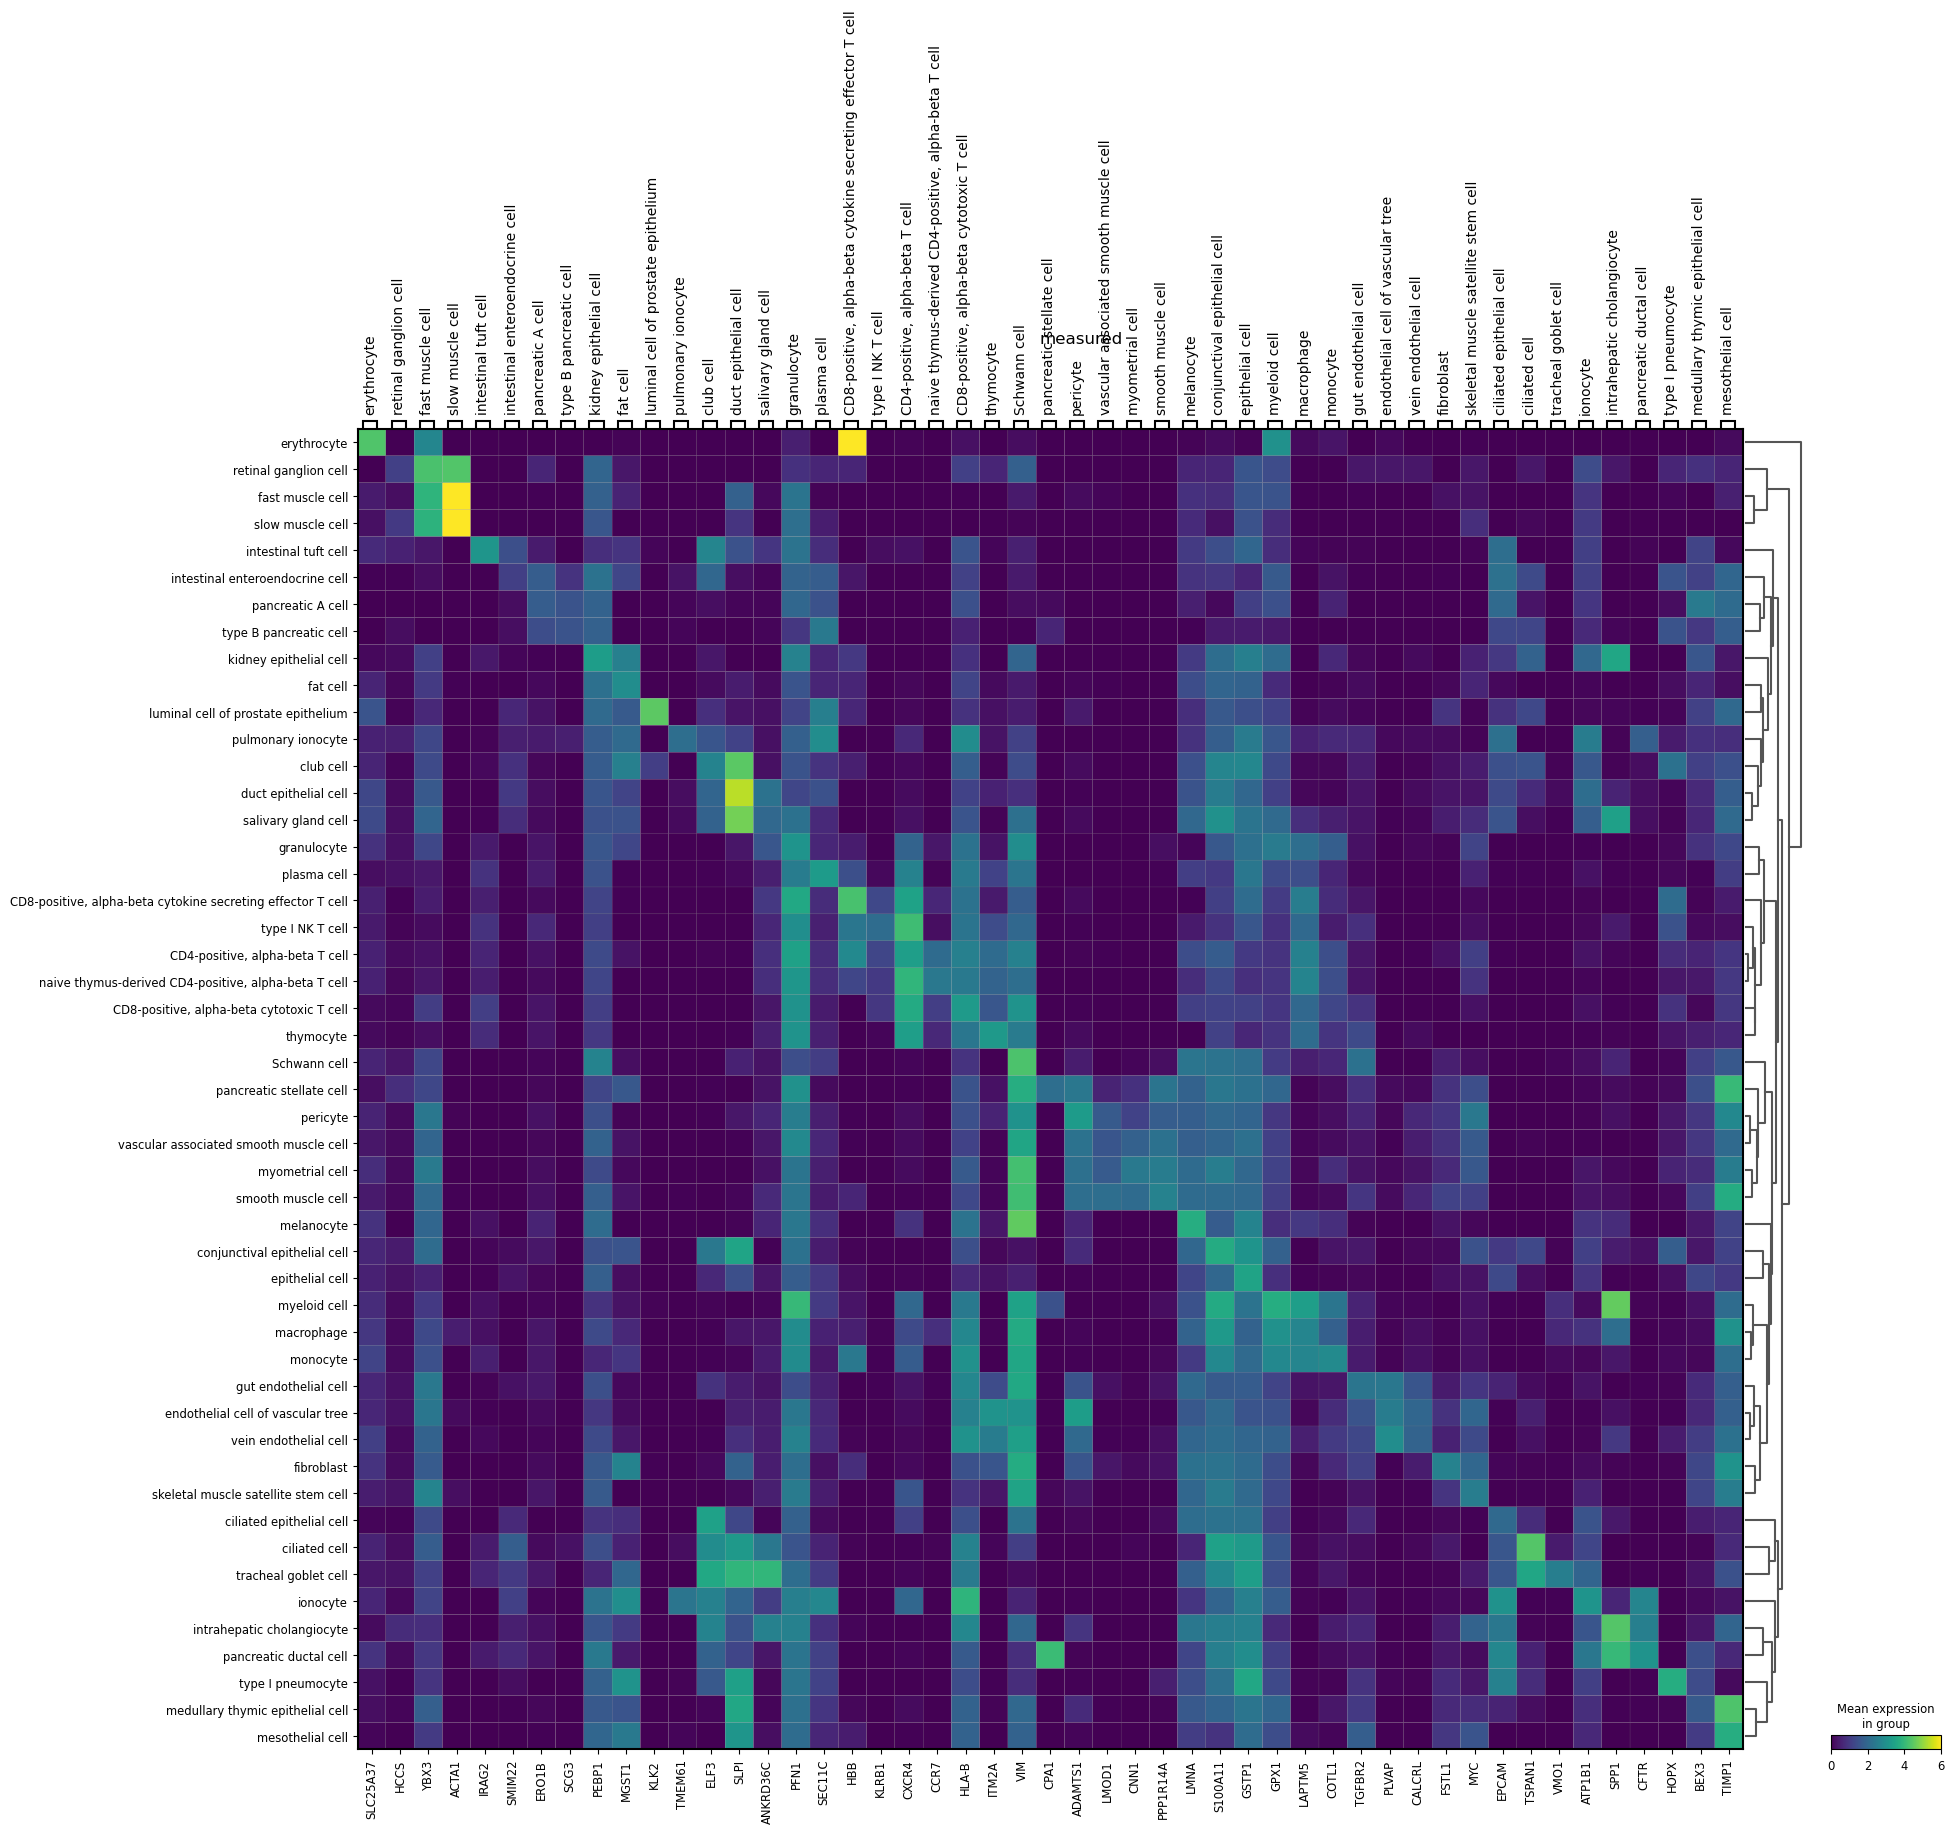

In [182]:
sc.pl.matrixplot(
    adata_test,
    marker_genes_dict,
    groupby="label",
    gene_symbols="feature_name",
    layer=None,
    vmin=0,
    vmax=6,
    show=False,
    title="measured",
    dendrogram=True,
)

In [183]:
markers = {}
for c in adata_p.uns['rank_genes_groups']['names'].dtype.names:
    genes = adata_p.uns['rank_genes_groups']['names'][c]
    logfoldchanges = adata_p.uns['rank_genes_groups']['logfoldchanges'][c]
    keep = np.logical_not(np.isin(genes, list(markers.values())))
    genes = genes[keep]
    logfoldchanges = logfoldchanges[keep]
    idx = logfoldchanges.argmax()
    markers[c] = genes[idx]

In [168]:
len(np.unique(list(markers.values())))

160

In [169]:
len(markers)

160

In [165]:
genes

array(['ENSG00000107281', 'ENSG00000130300', 'ENSG00000026025', ...,
       'ENSG00000121335', 'ENSG00000205649', 'ENSG00000251655'],
      dtype=object)

In [166]:
markers.keys()

dict_keys(['B cell', 'CD1c-positive myeloid dendritic cell', 'CD4-positive helper T cell', 'CD4-positive, alpha-beta T cell', 'CD4-positive, alpha-beta memory T cell', 'CD8-positive, alpha-beta T cell', 'CD8-positive, alpha-beta cytokine secreting effector T cell', 'CD8-positive, alpha-beta cytotoxic T cell', 'CD8-positive, alpha-beta memory T cell', 'CD141-positive myeloid dendritic cell', 'DN1 thymic pro-T cell', 'DN3 thymocyte', 'DN4 thymocyte', 'Langerhans cell', 'Mueller cell', 'Schwann cell', 'T cell', 'T follicular helper cell', 'acinar cell of salivary gland', 'adventitial cell', 'basal cell', 'basal cell of prostate epithelium', 'basophil', 'bladder urothelial cell', 'blood vessel endothelial cell', 'bronchial smooth muscle cell', 'capillary endothelial cell', 'cardiac endothelial cell', 'cardiac muscle cell', 'cell of skeletal muscle', 'ciliated cell', 'ciliated epithelial cell', 'classical monocyte', 'club cell', 'common myeloid progenitor', 'conjunctival epithelial cell', '

In [213]:
adata.obs.groupby('cell_type').count().index

CategoricalIndex(['B cell', 'CD1c-positive myeloid dendritic cell',
                  'CD4-positive helper T cell',
                  'CD4-positive, alpha-beta T cell',
                  'CD4-positive, alpha-beta memory T cell',
                  'CD8-positive, alpha-beta T cell',
                  'CD8-positive, alpha-beta cytokine secreting effector T cell',
                  'CD8-positive, alpha-beta cytotoxic T cell',
                  'CD8-positive, alpha-beta memory T cell',
                  'CD141-positive myeloid dendritic cell',
                  ...
                  'tongue muscle cell', 'tracheal goblet cell',
                  'transit amplifying cell of colon',
                  'transit amplifying cell of small intestine',
                  'type B pancreatic cell', 'type I NK T cell',
                  'type I pneumocyte', 'type II pneumocyte',
                  'vascular associated smooth muscle cell',
                  'vein endothelial cell'],
                 categ

In [214]:
adata.obs.groupby('cell_type').count().values[:, 0]

array([19807,   306,  9072, 14051,  4493, 12192,  1493,   630,  6022,
         184,   985,  1788,    32,    36,   360,    10, 14682,   398,
       10147,   815, 14065,  3298,   715,  4151,    47,    81,  5089,
        2665,  7205,    10,   317,    31, 13387,  2116,   290,  4587,
         249,  1488,   533,     6,  1693,    44,  7040,  5940, 13184,
        1202,   421,  1052,  3602,  2406,  2764,  1100,  9162,    52,
         194, 11004,    30,   843,   891,   352,    44, 32323,  2066,
         250,   311,   855,    99,   794,  2647,    44,  5131,   689,
         245,   114,    71,   113,   193,    42,   100,  3667,   595,
        8331,   385,  2286,    34,  1092,  5378,   602,   485, 35204,
        2238, 10339,    17,   166,   208, 15676, 15459,    41,   209,
       12514,    64,   437,  2227,     3,   196,  3070,   199,  6761,
         761,  3243,   698, 17694,  1044,    71,     9,    71,  5534,
        2431,   393,   888,   647,  4539,    17, 11545,    14,    96,
         268,    19,

In [216]:
adata_p.obs['cell_type'].map()

53d208b0-2cfd-4366-9866-c3c6114081bc_B cell                                                                    B cell
53d208b0-2cfd-4366-9866-c3c6114081bc_CD141-positive myeloid dendritic cell      CD141-positive myeloid dendritic cell
53d208b0-2cfd-4366-9866-c3c6114081bc_CD1c-positive myeloid dendritic cell        CD1c-positive myeloid dendritic cell
53d208b0-2cfd-4366-9866-c3c6114081bc_CD4-positive helper T cell                            CD4-positive helper T cell
53d208b0-2cfd-4366-9866-c3c6114081bc_CD4-positive, alpha-beta T cell                  CD4-positive, alpha-beta T cell
                                                                                                ...                  
53d208b0-2cfd-4366-9866-c3c6114081bc_type I NK T cell                                                type I NK T cell
53d208b0-2cfd-4366-9866-c3c6114081bc_type I pneumocyte                                              type I pneumocyte
53d208b0-2cfd-4366-9866-c3c6114081bc_type II pneumocyte 

In [192]:
adata_p

AnnData object with n_obs × n_vars = 160 × 19431
    obs: 'dataset_id', 'cell_type', 'cell_type_ontology_term_id', 'disease', 'disease_ontology_term_id', 'is_primary_data', 'suspension_type', 'label', 'sample', 'n_genes', 'train', 'marker_gene', 'marker_feature_name'
    var: 'soma_joinid', 'feature_name', 'feature_length', 'column_1', 'column_2', 'column_3', 'column_4', 'external_gene_name', 'gene_biotype', 'train', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'obs_embedding_pca', 'preprocessing', 'var_embedding_pca', 'rank_genes_groups', 'dendrogram_label', 'hvg'
    obsm: 'bin_edges', 'embedding', 'X_pca'
    varm: 'embedding', 'embedding_pca'
    layers: 'binned', 'counts', 'log1p', 'normalized_counts'

In [208]:
import matplotlib.pyplot as plt

adata_p.layers['normalized_counts'].sum(axis=1).max() - adata_p.layers['normalized_counts'].sum(axis=1).min()

0.00390625

In [ ]:
len(np.unique(list(markers.values())))

In [150]:
marker_genes_dict['pericyte']

'TAGLN'

In [151]:
marker_genes_dict['myometrial cell']

'TAGLN'

In [152]:
len(marker_genes_dict)

49

In [159]:
len(np.unique(list(marker_genes_dict.values())))

44

In [148]:
len(np.unique(marker_genes_dict.values())[0])

49

In [149]:
len(marker_genes_dict.values())

49

In [110]:
adata_p.uns['rank_genes_groups']['scores'][c]

-3.3265927

In [82]:
#adata_p.uns['rank_genes_groups']

In [ ]:
adata_p.var

In [11]:
keep_indices = np.isin(adata.var.index,  adata_p.var[np.logical_not(adata_p.var['train'])].index)

In [5]:
adata.var.index

Index(['ENSG00000121410', 'ENSG00000268895', 'ENSG00000148584',
       'ENSG00000175899', 'ENSG00000245105', 'ENSG00000166535',
       'ENSG00000256661', 'ENSG00000256904', 'ENSG00000184389',
       'ENSG00000128274',
       ...
       'ENSG00000286651', 'ENSG00000288632', 'ENSG00000288556',
       'ENSG00000287067', 'ENSG00000287276', 'ENSG00000286406',
       'ENSG00000287924', 'ENSG00000288153', 'ENSG00000287751',
       'ENSG00000288643'],
      dtype='object', name='feature_id', length=60638)

In [ ]:
adata = adata[:, np.isin(adata.var.index,  adata_p.var[np.logical_not(adata_p.var['train'])])]

In [9]:
import numpy as np
adata_p.var[np.logical_not(adata_p.var['train'])].index

Index(['ENSG00000118017', 'ENSG00000129968', 'ENSG00000255432',
       'ENSG00000258529', 'ENSG00000255663', 'ENSG00000254469',
       'ENSG00000166747', 'ENSG00000183020', 'ENSG00000006125',
       'ENSG00000161203',
       ...
       'ENSG00000177119', 'ENSG00000074855', 'ENSG00000185101',
       'ENSG00000136938', 'ENSG00000166825', 'ENSG00000169604',
       'ENSG00000138279', 'ENSG00000143412', 'ENSG00000002726',
       'ENSG00000251357'],
      dtype='object', length=5792)

In [ ]:
idx = np.isin(adata.uns['rank_genes_groups']['names']['B cell'], adata_p.var[np.logical_not(adata_p.var['train'])].index)

In [ ]:
adata_p.var.index

In [ ]:
160 * 5 / 60

In [ ]:
# sc.pp.normalize_total(adata, target_sum=1e5)
# sc.pp.log1p(adata)
# sc.tl.rank_genes_groups(adata, 'cell_type', method='t-test')

In [ ]:
adata.uns['rank_genes_groups']['names'].shape

In [ ]:
group_names = adata.uns['rank_genes_groups']['names'].dtype.names

In [ ]:
adata.uns['rank_genes_groups']['names']['B cell'][:10]

In [ ]:
adata.var.loc[a]['feature_name']

In [ ]:
adata

In [ ]:
adata.uns['rank_genes_groups']['scores']['B cell']

In [ ]:
adata.uns['rank_genes_groups']['logfoldchanges']['B cell']

In [ ]:
adata.uns['rank_genes_groups']['names']['B cell'][:10]

In [ ]:
adata.var['som']

In [ ]:
group_names

In [ ]:
len(adata.uns['rank_genes_groups']['names'].dtype.names)

In [ ]:
len(adata.uns['rank_genes_groups']['names'])

In [ ]:
len(adata.uns['rank_genes_groups']['names'][1])

In [ ]:
adata.var.set_index('feature_id')

In [ ]:
import numpy as np

np.unique(adata.uns['rank_genes_groups']['names'][0])

In [ ]:
type(adata.uns['rank_genes_groups']['names'][1])

In [ ]:
adata.uns['rank_genes_groups']['logfoldchanges']

In [ ]:
adata.uns['rank_genes_groups']['scores'].shape

In [ ]:
len(adata.uns['rank_genes_groups']['logfoldchanges'][0])

In [ ]:
len(adata.uns['rank_genes_groups']['names'])

In [ ]:
len(adata.uns['rank_genes_groups']['names'][0])

In [ ]:
adata.uns['rank_genes_groups']['names'][2]

In [ ]:
adata.var.loc['34842']

In [ ]:
adata_raw = ad.read_h5ad(ADATA_PT)

In [ ]:
adata_raw.uns['rank_genes_groups'] = adata.uns['rank_genes_groups']

In [ ]:
adata_raw.write_h5ad(ADATA_PT)

## Transformer style

In [27]:
from rosa.data.datasets import RosaObsVarDataset
from typing import Union, Optional, Tuple
from anndata import AnnData
import anndata as ad
import torch
from torch import Tensor
from rosa.utils.config import ExpressionTransformConfig


In [28]:
ADATA_P_PT = "/Users/nsofroniew/Documents/data/multiomics/cell_census/tabula_sapiens__sample_dataset_id__label_cell_type.h5ad"
VAR_INPUT = "embedding"
adata = ad.read_h5ad(ADATA_P_PT)

In [76]:
class RosaMaskedObsVarDataset(RosaObsVarDataset):
    """Iterates over cells

    When used with a batch of cell, returns data as ((BxG, BxG), BxGxGE), BxG)
    where B is number of cells in batch, G is number of genes,
    GE is length of gene embedding. The first (BxG, BxG) is the input expression,
    and masking matrix, the BxGxGE are the gene embeddings, and the BxG is
    the target expression to be predicted.
    """

    def __init__(
        self,
        adata: AnnData,
        *,
        var_input: str,
        masking: Optional[Union[float, str]] = None,
        obs_indices: Optional[torch.Tensor] = None,
        var_indices: Optional[torch.Tensor] = None,
        expression_layer: Optional[str] = None,
        expression_transform_config: Optional[ExpressionTransformConfig] = None,
        n_var_sample: Optional[int] = None,
    ) -> None:
        # If masking is var_indices then use those indices as always True in mask
        # and allow the indices to be provided by get item method
        if masking == 'var_indices':
            masking = var_indices
            var_indices = None
        super(RosaMaskedObsVarDataset, self).__init__(
            adata,
            obs_input='X',
            var_input=var_input,
            obs_indices=obs_indices,
            var_indices=var_indices,
            expression_layer=expression_layer,
            expression_transform_config=expression_transform_config,
            n_var_sample=n_var_sample
        )
        # Do masking
        if masking is None:
            self.mask = torch.zeros(self.input_dim[0], dtype=bool) # type: Union[float, torch.Tensor]
        elif isinstance(masking, float):
            self.mask = masking
        elif isinstance(masking, torch.Tensor):
            self.mask = torch.zeros(self.input_dim[0], dtype=bool)
            self.mask[masking.long()] = True
        else:
            raise ValueError('Unrecognized masking type')

    def __getitem__(self, idx: int) -> Tuple[Tuple[Tuple[Tensor, Tensor], Tensor], Tensor]:
        (input_obs, input_var), expression = super(RosaMaskedObsVarDataset, self).__getitem__(idx)
        # Undo view
        input_obs = input_obs[0]
        # Do masking
        if not isinstance(self.mask, torch.Tensor):
            mask = torch.rand_like(input_obs) <= self.mask
        else:
            mask = self.mask
        return ((input_obs, mask), input_var), expression


In [77]:
import numpy as np
var_indices_val = torch.Tensor(np.where(np.logical_not(adata.var["train"]))[0])

In [78]:
rds = RosaMaskedObsVarDataset(adata, var_input=VAR_INPUT, var_indices=var_indices_val, masking=0.15)

In [79]:
rds[0][0][0]

(tensor([1.6354e-01, 9.8437e-04, 2.0945e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]),
 tensor([False, False, False,  ..., False,  True, False]))

In [80]:
rds[0][0][1].shape

torch.Size([5792, 3072])

In [69]:
import numpy as np
var_indices_val = torch.Tensor(np.where(np.logical_not(adata.var["train"]))[0])


In [81]:
rds = RosaMaskedObsVarDataset(adata, var_input=VAR_INPUT, var_indices=var_indices_val, masking='var_indices')

In [83]:
rds[0][0][0]

(tensor([1.6354e-01, 9.8437e-04, 2.0945e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]),
 tensor([False,  True,  True,  ..., False, False,  True]))

In [84]:
rds[0][0][0][0].shape

torch.Size([19431])

In [86]:
torch.zeros(5, dtype=torch.bool)

tensor([False, False, False, False, False])

In [87]:
rds.input_dim

(19431, 3072)

In [89]:
rds.mask

tensor([False,  True,  True,  ..., False, False,  True])

In [90]:
import torch.nn as nn

In [92]:
mask = nn.Linear(1, 10)

In [93]:
mask.weight

Parameter containing:
tensor([[ 0.4181],
        [ 0.2140],
        [ 0.4682],
        [-0.4238],
        [ 0.4144],
        [ 0.1602],
        [ 0.5802],
        [-0.6429],
        [ 0.8717],
        [ 0.6268]], requires_grad=True)

In [1]:
import torch

In [ ]:
            boundaries = torch.quantile(tensor, torch.linspace(0, 1, self.n_bins))
        return torch.bucketize(tensor, boundaries)